In [3]:
import sys
import pandas as pd
import numpy as np
import torch
from torch import Tensor

from matplotlib import pyplot as plt

sys.path.append("../")
from src.log import myLogger
from src.repository.data_repository import DataRepository
from src.checkpoint.checkpoint import Checkpoint

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 600)

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
logger = myLogger("../logs/temp.log", exp_id="e000", wdb_prj_id="temp", exp_config=None, use_wdb=False) 
dr = DataRepository(logger=logger, local_root_path="..")

2021-11-01 23:15:01,346 log.py               31   [INFO] [__init__] skip wandb init 


In [5]:
train_df = dr.load_train_df()
train_df

,id,context,question,answer_text,answer_start,language
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவ...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,68,tamil
4,b29c82c22,சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,585,tamil
...,...,...,...,...,...,...
1109,26f356026,स्वामी निगमानन्द परमहंस (18 अगस्त 1880 - 29 नव...,स्वामी निगमानन्द परमहंस के तन्त्र गुरु कौन थे?,बामाक्षेपा,2691,hindi
1110,31179f1bb,भरत मुनि ने नाट्यशास्त्र नामक प्रसिद्ध ग्रन्थ ...,नित्यशास्त्र किसने लिखा है?,भरत मुनि,0,hindi
1111,0d35dc007,अग्नि पंचम (अग्नि-५) भारत की अन्तरमहाद्वीपीय ब...,अग्नि पंचम(५) मिसाइल की लम्बाई कितने मीटर है?,17,155,hindi
1112,7f997884d,"जलाल उद्दीन मोहम्मद अकबर () (१५ अक्तूबर, १५४२-...",मुगल सम्राट अकबर की मृत्यु किस वर्ष में हुई थी?,"२७ अक्तूबर, १६०५",46,hindi


min: 1
max: 286


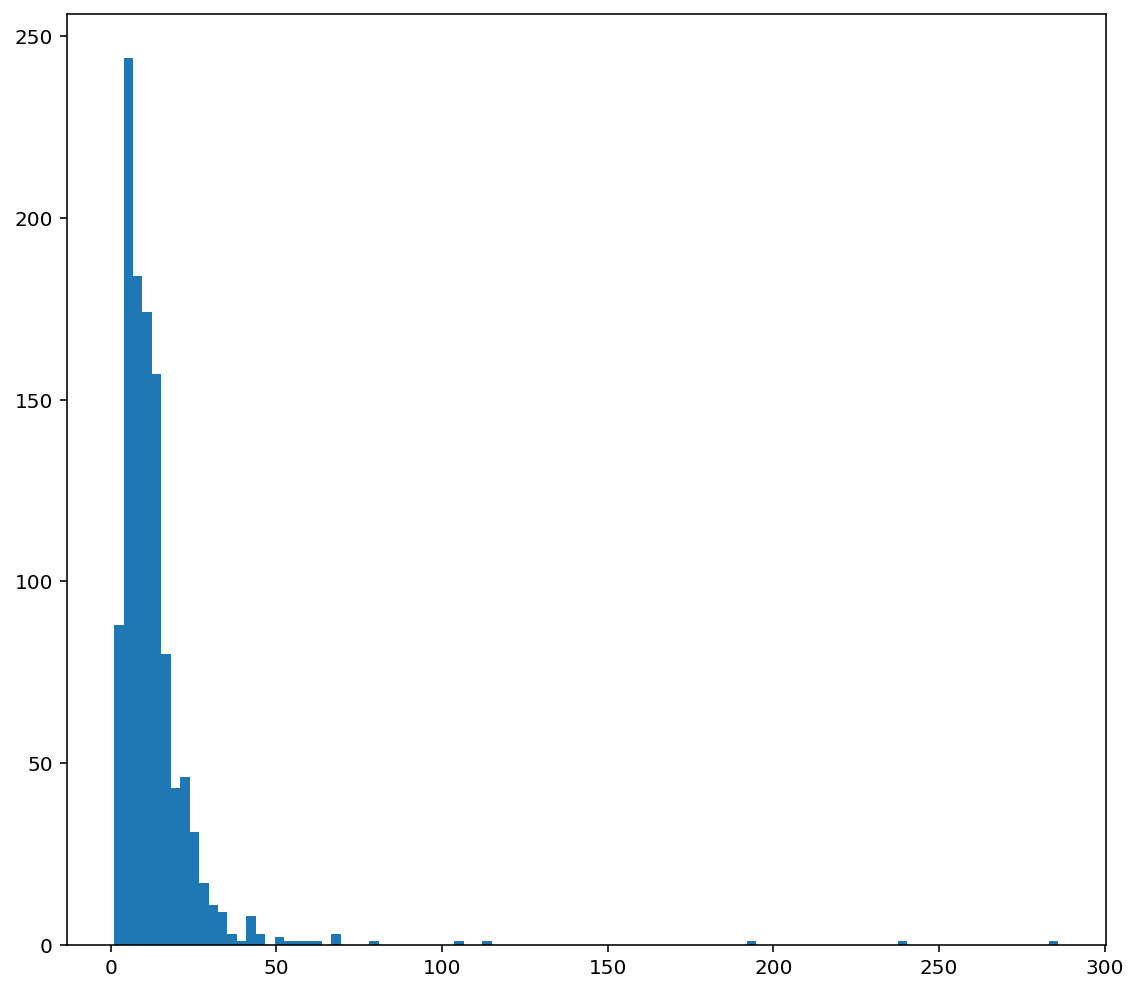

In [7]:
answer_text_lengths = train_df.answer_text.apply(lambda x: len(x)).values
print(f"min: {answer_text_lengths.min()}")
print(f"max: {answer_text_lengths.max()}")
plt.figure(figsize=(8, 7))
plt.hist(answer_text_lengths, bins=100)
plt.tight_layout()
plt.show()

In [10]:
a = pd.Series(answer_text_lengths).value_counts().sort_index().reset_index()
a.columns = ["length", "len_count"]
a["cum_count"] = a.len_count.cumsum()
a["cum_ratio"] = a.cum_count / len(answer_text_lengths)
a

,length,len_count,cum_count,cum_ratio
0,1,6,6,0.005386
1,2,41,47,0.042190
2,3,41,88,0.078995
3,4,122,210,0.188510
4,5,39,249,0.223519
5,6,83,332,0.298025
6,7,63,395,0.354578
7,8,62,457,0.410233
8,9,59,516,0.463196
9,10,66,582,0.522442
